In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('/Users/jmaxi/Portafolio/Data usada/Credit card/BankChurners.csv/BankChurners.csv')

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
CLIENTNUM                                                                                                                             10127 non-null int64
Attrition_Flag                                                                                                                        10127 non-null object
Customer_Age                                                                                                                          10127 non-null int64
Gender                                                                                                                                10127 non-null object
Dependent_count                                                                                                                       10127 non-null int64
Education_Level                                                                                                   

In [5]:
data.shape

(10127, 23)

In [3]:
data = data.iloc[:,:21]

In [58]:
pd.set_option("display.max_rows", None, "display.max_columns", None) #vemos el dataset completo

In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


---
Null values

In [8]:
data.isnull().values.ravel().sum()

0

---

Transform Attrited Flag to 0 and 1

In [131]:
dummy_flag = pd.get_dummies(data['Attrition_Flag'], drop_first= True ,prefix = 'Flag')

In [132]:
data = pd.concat([data, dummy_flag], axis = 1)

---
I investigate the characteristics of those who left the service and those who still remain

In [62]:
data.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [66]:
data.Attrition_Flag.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

Existing Customer    83.93%
Attrited Customer    16.07%
Name: Attrition_Flag, dtype: object

16.07% of people left the service

In [9]:
existing_c = data[data['Flag_Existing Customer'] == 1]

In [10]:
attrited_c = data[data['Flag_Attrited Customer'] == 1]

#### Gender:

In [16]:
data['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [15]:
existing_c['Gender'].value_counts()

F    4428
M    4072
Name: Gender, dtype: int64

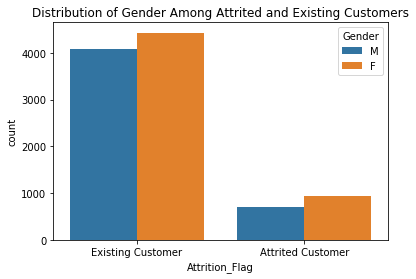

In [64]:
sns.countplot(x='Attrition_Flag', data=data, hue='Gender')
plt.title("Distribution of Gender Among Attrited and Existing Customers")
plt.show()

In [106]:
gender_p = {
    '-' : ['Total', 'Existing', 'Attrited'],
    'F' : [data.Gender.value_counts(normalize = True).mul(100).round(1)[0].astype(str) + '% ', existing_c.Gender.value_counts(normalize = True).mul(100).round(1)[0].astype(str) + '% ', attrited_c.Gender.value_counts(normalize = True).mul(100).round(1)[0].astype(str) + '% '],
    'M' : [data.Gender.value_counts(normalize = True).mul(100).round(1)[1].astype(str) + '% ', existing_c.Gender.value_counts(normalize = True).mul(100).round(1)[1].astype(str) + '% ', attrited_c.Gender.value_counts(normalize = True).mul(100).round(1)[1].astype(str) + '% ']
    }

In [39]:
gender_per = pd.DataFrame(gender_p)
gender_per

,-,F,M
0,Total,52.9%,47.1%
1,Existing,52.1%,47.9%
2,Attrited,57.2%,42.8%


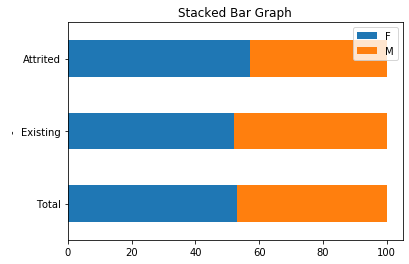

In [42]:
gender_graf = {
    '-' : ['Total', 'Existing', 'Attrited'],
    'F' : [data.Gender.value_counts(normalize = True).mul(100)[0], existing_c.Gender.value_counts(normalize = True).mul(100)[0], attrited_c.Gender.value_counts(normalize = True).mul(100)[0]],
    'M' : [data.Gender.value_counts(normalize = True).mul(100)[1], existing_c.Gender.value_counts(normalize = True).mul(100)[1], attrited_c.Gender.value_counts(normalize = True).mul(100)[1]]
    }

gender_graf = pd.DataFrame(gender_graf)

gender_graf.plot( 
    x = '-', 
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True) 

Those who leave the service the most, by a slight difference, are women. It is advisable to investigate the reason.

In [34]:
data.Gender.value_counts(normalize = True).mul(100)[0]

52.908067542213885

#### Age:

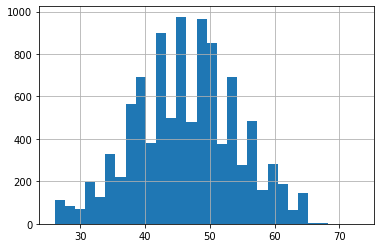

In [58]:
plt.hist(data.Customer_Age, bins = 30)
plt.grid()

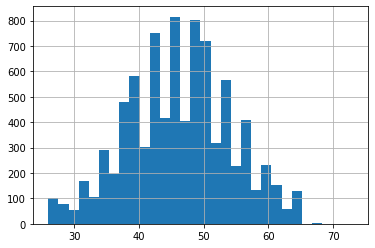

In [56]:
#Current customers
plt.hist(existing_c['Customer_Age'], bins = 30)
plt.grid()

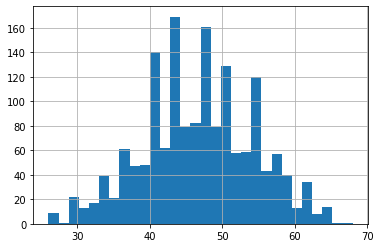

In [54]:
#Ex customers
plt.hist(attrited_c['Customer_Age'], bins = 30)
plt.grid()

#### Ed level:

In [60]:
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [100]:
ed_level = {
    '-' : ['Total', 'Existing', 'Attrited'],
    'Graduate' : [data.Education_Level.value_counts(normalize = True).mul(100).round(2)[0].astype(str) + '% ', existing_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[0].astype(str) + '% ', attrited_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[0].astype(str) + '% '],
    'High School' : [data.Education_Level.value_counts(normalize = True).mul(100).round(2)[1].astype(str) + '% ', existing_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[1].astype(str) + '% ', attrited_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[1].astype(str) + '% '],
    'Unknown' : [data.Education_Level.value_counts(normalize = True).mul(100).round(2)[2].astype(str) + '% ', existing_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[2].astype(str) + '% ', attrited_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[2].astype(str) + '% '],
    'Uneducated' : [data.Education_Level.value_counts(normalize = True).mul(100).round(2)[3].astype(str) + '% ', existing_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[3].astype(str) + '% ', attrited_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[3].astype(str) + '% '],
    'College' : [data.Education_Level.value_counts(normalize = True).mul(100).round(2)[4].astype(str) + '% ', existing_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[4].astype(str) + '% ', attrited_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[4].astype(str) + '% '],
    'Post graduate' : [data.Education_Level.value_counts(normalize = True).mul(100).round(2)[5].astype(str) + '% ', existing_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[5].astype(str) + '% ', attrited_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[5].astype(str) + '% '],
    'Doctorate' : [data.Education_Level.value_counts(normalize = True).mul(100).round(2)[6].astype(str) + '% ', existing_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[6].astype(str) + '% ', attrited_c.Education_Level.value_counts(normalize = True).mul(100).round(2)[6].astype(str) + '% '],
}

In [101]:
el = pd.DataFrame(ed_level)
el

,-,Graduate,High School,Unknown,Uneducated,College,Post graduate,Doctorate
0,Total,30.89%,19.88%,15.0%,14.68%,10.0%,5.1%,4.45%
1,Existing,31.07%,20.08%,14.86%,14.71%,10.11%,4.99%,4.19%
2,Attrited,29.93%,18.81%,15.73%,14.57%,9.47%,5.84%,5.65%


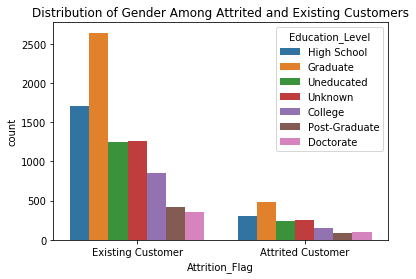

In [65]:
sns.countplot(x='Attrition_Flag', data=data, hue='Education_Level')
plt.title("Distribution of Gender Among Attrited and Existing Customers")
plt.show()

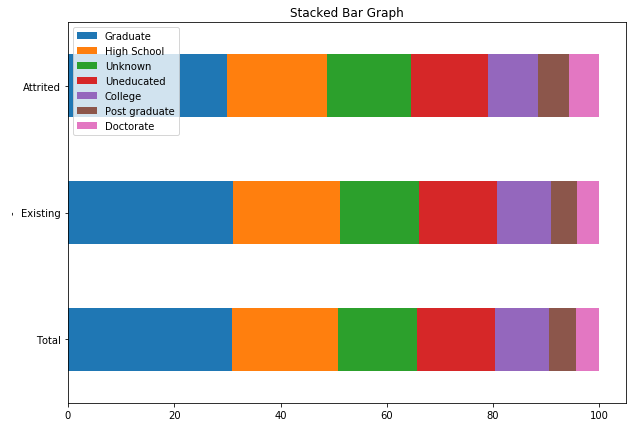

In [103]:
ed_level_graph = {
    '-' : ['Total', 'Existing', 'Attrited'],
    'Graduate' : [data.Education_Level.value_counts(normalize = True).mul(100)[0], existing_c.Education_Level.value_counts(normalize = True).mul(100)[0], attrited_c.Education_Level.value_counts(normalize = True).mul(100)[0]],
    'High School' : [data.Education_Level.value_counts(normalize = True).mul(100)[1], existing_c.Education_Level.value_counts(normalize = True).mul(100)[1], attrited_c.Education_Level.value_counts(normalize = True).mul(100)[1]],
    'Unknown' : [data.Education_Level.value_counts(normalize = True).mul(100)[2], existing_c.Education_Level.value_counts(normalize = True).mul(100)[2], attrited_c.Education_Level.value_counts(normalize = True).mul(100)[2]],
    'Uneducated' : [data.Education_Level.value_counts(normalize = True).mul(100)[3], existing_c.Education_Level.value_counts(normalize = True).mul(100)[3], attrited_c.Education_Level.value_counts(normalize = True).mul(100)[3]],
    'College' : [data.Education_Level.value_counts(normalize = True).mul(100)[4], existing_c.Education_Level.value_counts(normalize = True).mul(100)[4], attrited_c.Education_Level.value_counts(normalize = True).mul(100)[4]],
    'Post graduate' : [data.Education_Level.value_counts(normalize = True).mul(100)[5], existing_c.Education_Level.value_counts(normalize = True).mul(100)[5], attrited_c.Education_Level.value_counts(normalize = True).mul(100)[5]],
    'Doctorate' : [data.Education_Level.value_counts(normalize = True).mul(100)[6], existing_c.Education_Level.value_counts(normalize = True).mul(100)[6], attrited_c.Education_Level.value_counts(normalize = True).mul(100)[6]],
}

ed_level_graph = pd.DataFrame(ed_level_graph)

ed_level_graph.plot( 
    x = '-', 
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True,
    figsize = (10,7)) 

I don't see considerable differences.

#### Marital status

In [104]:
data['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [110]:
marital_stat = {
    '-' : ['Total', 'Existing', 'Attrited'],
    'Married' : [data.Marital_Status.value_counts(normalize = True).mul(100).round(1)[0].astype(str) + '% ', existing_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[0].astype(str) + '% ', attrited_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[0].astype(str) + '% '],
    'Single' : [data.Marital_Status.value_counts(normalize = True).mul(100).round(1)[1].astype(str) + '% ', existing_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[1].astype(str) + '% ', attrited_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[1].astype(str) + '% '],
    'Unknown' : [data.Marital_Status.value_counts(normalize = True).mul(100).round(1)[2].astype(str) + '% ', existing_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[2].astype(str) + '% ', attrited_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[2].astype(str) + '% '],
    'Divorced' : [data.Marital_Status.value_counts(normalize = True).mul(100).round(1)[3].astype(str) + '% ', existing_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[3].astype(str) + '% ', attrited_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[3].astype(str) + '% '],
    }

In [111]:
pd.DataFrame(marital_stat)

,-,Married,Single,Unknown,Divorced
0,Total,46.3%,38.9%,7.4%,7.4%
1,Existing,46.8%,38.5%,7.4%,7.3%
2,Attrited,43.6%,41.1%,7.9%,7.4%


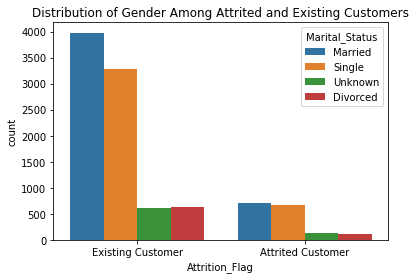

In [66]:
sns.countplot(x='Attrition_Flag', data=data, hue='Marital_Status')
plt.title("Distribution of Gender Among Attrited and Existing Customers")
plt.show()

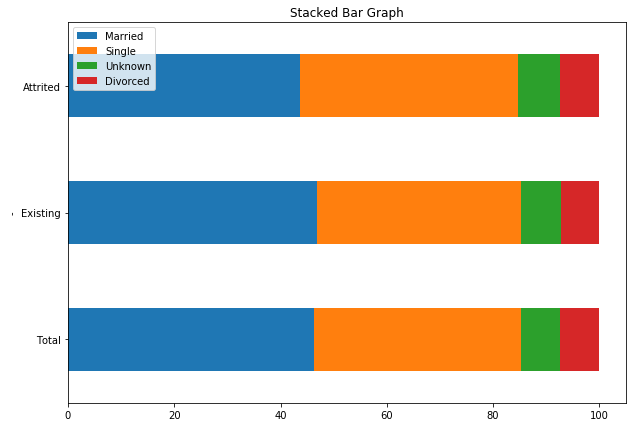

In [112]:
marital_stat_gra = {
    '-' : ['Total', 'Existing', 'Attrited'],
    'Married' : [data.Marital_Status.value_counts(normalize = True).mul(100).round(1)[0], existing_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[0], attrited_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[0]],
    'Single' : [data.Marital_Status.value_counts(normalize = True).mul(100).round(1)[1], existing_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[1], attrited_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[1]],
    'Unknown' : [data.Marital_Status.value_counts(normalize = True).mul(100).round(1)[2], existing_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[2], attrited_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[2]],
    'Divorced' : [data.Marital_Status.value_counts(normalize = True).mul(100).round(1)[3], existing_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[3], attrited_c.Marital_Status.value_counts(normalize = True).mul(100).round(1)[3]],
    }

mar_gra = pd.DataFrame(marital_stat_gra)

mar_gra.plot( 
    x = '-', 
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True,
    figsize = (10,7)) 

By a slight difference, singles drop out more.

#### Card categoty

In [113]:
data['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [123]:
card_t = {
    '-' : ['Total', 'Existing', 'Attrited'],
    'Blue' : [data.Card_Category.value_counts(normalize = True).mul(100).round(2)[0].astype(str) + '% ', existing_c.Card_Category.value_counts(normalize = True).mul(100).round(2)[0].astype(str) + '% ', attrited_c.Card_Category.value_counts(normalize = True).mul(100).round(2)[0].astype(str) + '% '],
    'Silver' : [data.Card_Category.value_counts(normalize = True).mul(100).round(2)[1].astype(str) + '% ', existing_c.Card_Category.value_counts(normalize = True).mul(100).round(2)[1].astype(str) + '% ', attrited_c.Card_Category.value_counts(normalize = True).mul(100).round(2)[1].astype(str) + '% '],
    'Gold' : [data.Card_Category.value_counts(normalize = True).mul(100).round(2)[2].astype(str) + '% ', existing_c.Card_Category.value_counts(normalize = True).mul(100).round(2)[2].astype(str) + '% ', attrited_c.Card_Category.value_counts(normalize = True).mul(100).round(2)[2].astype(str) + '% '],
    'Platinum' : [data.Card_Category.value_counts(normalize = True).mul(100).round(2)[3].astype(str) + '% ', existing_c.Card_Category.value_counts(normalize = True).mul(100).round(2)[3].astype(str) + '% ', attrited_c.Card_Category.value_counts(normalize = True).mul(100).round(2)[3].astype(str) + '% ']
    }

card_t = pd.DataFrame(card_t)

card_t

,-,Blue,Silver,Gold,Platinum
0,Total,93.18%,5.48%,1.15%,0.2%
1,Existing,93.14%,5.56%,1.12%,0.18%
2,Attrited,93.36%,5.04%,1.29%,0.31%


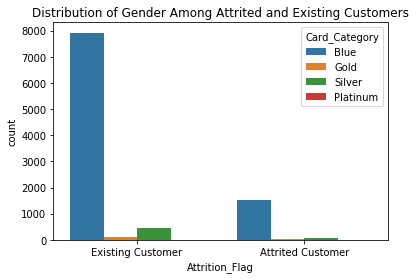

In [68]:
sns.countplot(x='Attrition_Flag', data=data, hue='Card_Category')
plt.title("Distribution of Gender Among Attrited and Existing Customers")
plt.show()

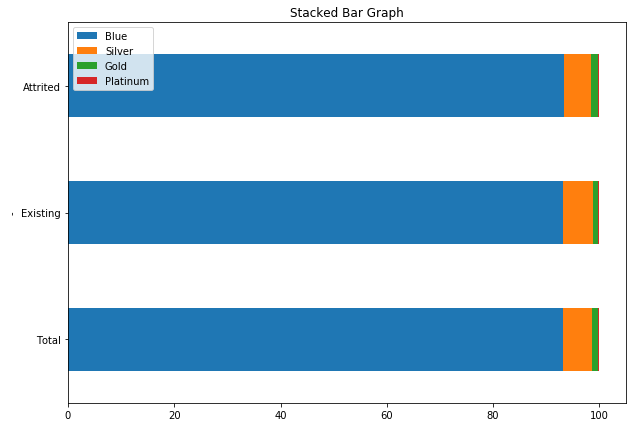

In [121]:
card_graf = {
    '-' : ['Total', 'Existing', 'Attrited'],
    'Blue' : [data.Card_Category.value_counts(normalize = True).mul(100)[0], existing_c.Card_Category.value_counts(normalize = True).mul(100)[0], attrited_c.Card_Category.value_counts(normalize = True).mul(100)[0]],
    'Silver' : [data.Card_Category.value_counts(normalize = True).mul(100)[1], existing_c.Card_Category.value_counts(normalize = True).mul(100)[1], attrited_c.Card_Category.value_counts(normalize = True).mul(100)[1]],
    'Gold' : [data.Card_Category.value_counts(normalize = True).mul(100)[2], existing_c.Card_Category.value_counts(normalize = True).mul(100)[2], attrited_c.Card_Category.value_counts(normalize = True).mul(100)[2]],
    'Platinum' : [data.Card_Category.value_counts(normalize = True).mul(100)[3], existing_c.Card_Category.value_counts(normalize = True).mul(100)[3], attrited_c.Card_Category.value_counts(normalize = True).mul(100)[3]]
    }

card_graf = pd.DataFrame(card_graf)

card_graf.plot( 
    x = '-', 
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True,
    figsize = (10,7)) 

In [124]:
platinum = data[data['Card_Category'] == 'Platinum']

In [126]:
platinum.Attrition_Flag.value_counts()

Existing Customer    15
Attrited Customer     5
Name: Attrition_Flag, dtype: int64

A considerable amount of the total platinum members have left the mark.

#### Period of relationship with the bank

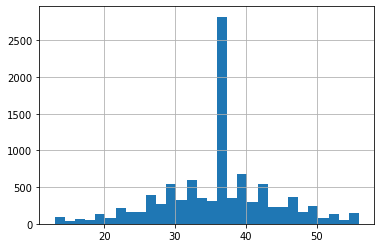

In [11]:
plt.hist(data['Months_on_book'], bins = 30)
plt.grid()

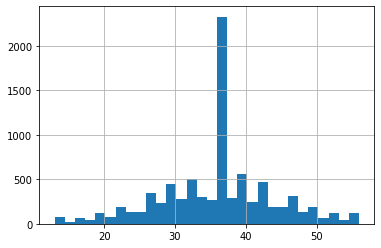

In [12]:
plt.hist(existing_c['Months_on_book'], bins = 30)
plt.grid()

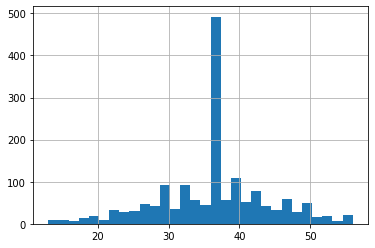

In [13]:
plt.hist(attrited_c['Months_on_book'], bins = 30)
plt.grid()

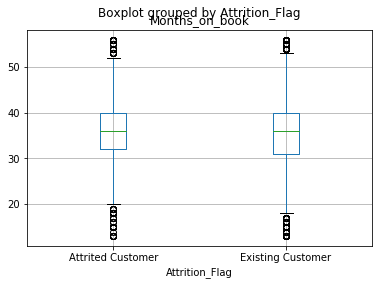

In [21]:
data.boxplot('Months_on_book', by = 'Attrition_Flag')

#### Credit card limit

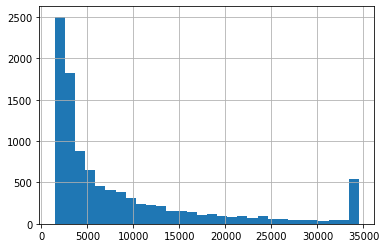

In [14]:
plt.hist(data['Credit_Limit'], bins = 30)
plt.grid()

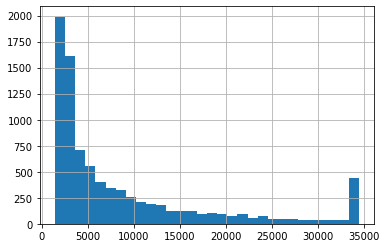

In [15]:
plt.hist(existing_c['Credit_Limit'], bins = 30)
plt.grid()

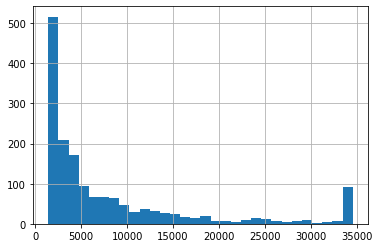

In [16]:
plt.hist(attrited_c['Credit_Limit'], bins = 30)
plt.grid()

#### Months inactive

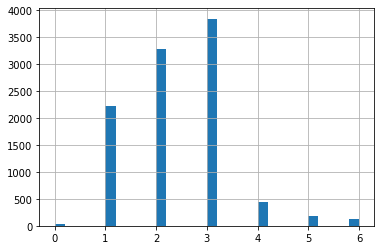

In [17]:
plt.hist(data['Months_Inactive_12_mon'], bins = 30)
plt.grid()

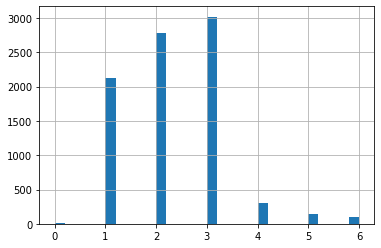

In [18]:
plt.hist(existing_c['Months_Inactive_12_mon'], bins = 30)
plt.grid()

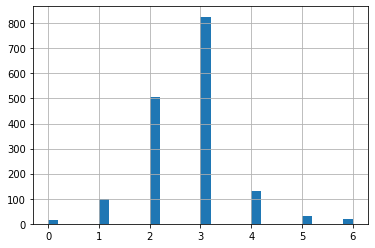

In [19]:
plt.hist(attrited_c['Months_Inactive_12_mon'], bins = 30)
plt.grid()

#### Income category

In [22]:
data.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

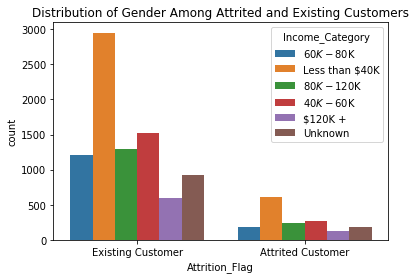

In [70]:
sns.countplot(x='Attrition_Flag', data=data, hue='Income_Category')
plt.title("Distribution of Gender Among Attrited and Existing Customers")
plt.show()

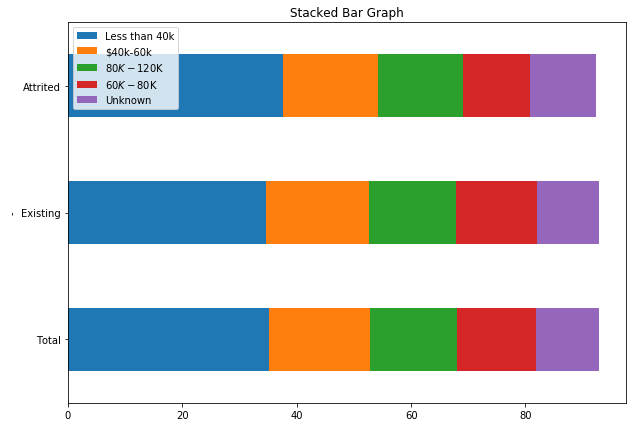

In [25]:
income_graf = {
    '-' : ['Total', 'Existing', 'Attrited'],
    'Less than 40k' : [data.Income_Category.value_counts(normalize = True).mul(100)[0], existing_c.Income_Category.value_counts(normalize = True).mul(100)[0], attrited_c.Income_Category.value_counts(normalize = True).mul(100)[0]],
    '$40k-60k' : [data.Income_Category.value_counts(normalize = True).mul(100)[1], existing_c.Income_Category.value_counts(normalize = True).mul(100)[1], attrited_c.Income_Category.value_counts(normalize = True).mul(100)[1]],
    '$80K - $120K' : [data.Income_Category.value_counts(normalize = True).mul(100)[2], existing_c.Income_Category.value_counts(normalize = True).mul(100)[2], attrited_c.Income_Category.value_counts(normalize = True).mul(100)[2]],
    '$60K - $80K ' : [data.Income_Category.value_counts(normalize = True).mul(100)[3], existing_c.Income_Category.value_counts(normalize = True).mul(100)[3], attrited_c.Income_Category.value_counts(normalize = True).mul(100)[3]],
    'Unknown' : [data.Income_Category.value_counts(normalize = True).mul(100)[4], existing_c.Income_Category.value_counts(normalize = True).mul(100)[4], attrited_c.Income_Category.value_counts(normalize = True).mul(100)[4]]
    }

income_graf = pd.DataFrame(income_graf)

income_graf.plot( 
    x = '-', 
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True,
    figsize = (10,7)) 

---
#### Data preparation

In [102]:
def dummy(cat = [], data = data):
    dum = pd.get_dummies(data[cat], drop_first= True ,prefix = cat)
    dat = pd.concat([data, dum], axis = 1)
    return dat

In [133]:
prueba = dummy(cat = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], data = data)

In [134]:
prueba.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Flag_Existing Customer,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [105]:
prueba.shape

(10127, 39)

In [139]:
dum_data = prueba.iloc[:,9:40]

In [140]:
dum_data.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Flag_Existing Customer,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [141]:
dum_data['Customer_Age'] = data['Customer_Age']
dum_data['Dependent_count'] = data['Dependent_count']

In [142]:
dum_data.to_csv('/Users/jmaxi/Portafolio/Data usada/Credit card/BankChurners.csv/dum_data.csv')

In [143]:
dum_data.corr()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Flag_Existing Customer,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Customer_Age,Dependent_count
Months_on_book,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,-0.013687,-0.006728,0.024114,0.003531,0.002637,-0.016703,0.001099,-3.610193e-03,0.033194,-0.005065,-0.026145,-0.003204,-0.016635,0.007720,-0.004300,-0.007688,-0.005426,1.791336e-03,-0.014357,0.788912,-0.103062
Total_Relationship_Count,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,0.150005,0.003157,-0.009077,0.005397,-0.001707,0.012050,0.008202,-3.969299e-03,0.017001,-0.017329,-0.009376,-0.008747,0.005475,0.001185,0.005109,0.000490,-0.055678,-4.328912e-02,-0.060566,-0.010931,-0.039076
Months_Inactive_12_mon,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,-0.152449,-0.011163,0.002432,0.005885,-0.005575,-0.006240,0.010127,-1.237820e-02,-0.007065,0.008973,-0.005053,-0.021437,-0.004616,-0.005910,0.018848,0.011446,-0.003283,-4.013053e-03,-0.016034,0.054361,-0.010768
Contacts_Count_12_mon,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,-0.204491,0.039987,-0.001016,0.002660,-0.003927,-0.006878,0.012596,8.432068e-04,0.001598,0.007997,-0.009562,0.002336,0.000167,0.011473,-0.023255,0.002195,-0.000685,1.796882e-03,-0.001059,-0.018452,-0.040505
Credit_Limit,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,0.023873,0.420806,-0.005195,-0.004844,-0.001432,0.005879,0.012213,-6.478159e-03,-0.056713,0.032309,0.025291,-0.161605,0.093808,0.333828,-0.395233,0.034186,0.234331,1.059761e-01,0.441030,0.002476,0.068065
Total_Revolving_Bal,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,0.263053,0.029658,-0.018208,-0.000356,0.019276,0.007068,-0.004446,-1.218775e-03,0.039124,-0.037794,-0.001756,0.005220,-0.003847,0.022776,-0.015974,-0.020578,0.023974,5.738860e-03,0.012799,0.014780,-0.002688
Avg_Open_To_Buy,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,0.000285,0.418059,-0.003562,-0.004811,-0.003160,0.005244,0.012609,-6.367535e-03,-0.060209,0.035691,0.025443,-0.162039,0.094133,0.331716,-0.393718,0.036024,0.232132,1.054393e-01,0.439790,0.001151,0.068291
Total_Amt_Chng_Q4_Q1,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235,0.131063,0.026712,-0.018612,-0.007694,0.005834,0.008208,0.000956,2.430115e-03,0.052388,-0.043323,-0.013484,-0.000867,0.022399,0.012905,-0.025276,0.007951,0.006219,4.091173e-03,0.002621,-0.062042,-0.035439
Total_Trans_Amt,-0.038591,-0.347229,-0.036982,-0.112774,0.171730,0.064370,0.165923,0.039678,1.000000,0.807192,0.085581,-0.083034,0.168598,0.024890,-0.013415,0.002835,-0.000051,0.007594,0.009801,1.974518e-03,-0.063030,0.044772,0.026283,0.000209,0.005502,0.009814,-0.008816,-0.012601,0.103986,6.018129e-02,0.154983,-0.046446,0.025046
Total_Trans_Ct,-0.049819,-0.241891,-0.042787,-0.152213,0.075927,0.056060,0.070885,0.005469,0.807192,1.000000,0.112324,0.002838,0.371403,-0.067454,-0.009877,0.000701,-0.003516,0.001395,0.008072,-2.018984e-03,-0.123911,0.098586,0.

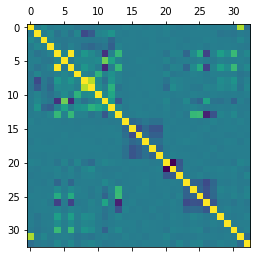

In [144]:
plt.matshow(dum_data.corr())

In [145]:
c = df.corr()

c1 = c.abs().unstack()
c1.sort_values(ascending = False)[44:54]

Unnamed: 0                      Total_Trans_Ct                    0.696273
Avg_Utilization_Ratio           Total_Revolving_Bal               0.624022
Total_Revolving_Bal             Avg_Utilization_Ratio             0.624022
Income_Category_Less than $40K  Gender_M                          0.580016
Gender_M                        Income_Category_Less than $40K    0.580016
Avg_Open_To_Buy                 Avg_Utilization_Ratio             0.538808
Avg_Utilization_Ratio           Avg_Open_To_Buy                   0.538808
                                Credit_Limit                      0.482965
Credit_Limit                    Avg_Utilization_Ratio             0.482965
Income_Category_$80K - $120K    Gender_M                          0.448017
dtype: float64

---
### Pre-processed

In [72]:
#bueno, ahora el modelado, antes voy a normalizar las variables que no sean dummies.

In [3]:
df = pd.read_csv('/Users/jmaxi/Portafolio/Data usada/Credit card/BankChurners.csv/dum_data.csv', index_col = False)

In [4]:
df.head()

,Unnamed: 0,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Customer_Age,Dependent_count
0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,...,0,1,0,0,0,0,0,0,45,3
1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,...,0,0,0,1,0,0,0,0,49,5
2,2,36,4,1,0,3418.0,0,3418.0,2.594,1887,...,0,0,1,0,0,0,0,0,51,3
3,3,34,3,4,1,3313.0,2517,796.0,1.405,1171,...,0,0,0,1,0,0,0,0,40,4
4,4,21,5,1,0,4716.0,0,4716.0,2.175,816,...,0,1,0,0,0,0,0,0,40,3


In [148]:
df.shape

(10127, 34)

In [5]:
#Normalizamos
def minMax(data):
    from sklearn.preprocessing import MinMaxScaler
    import joblib as jl
    #Escalamos y guardamos scaler para posterior uso
    scaler = MinMaxScaler()
    scaler.fit(data)
    scaled = scaler.transform(data)
    jl.dump(scaled ,'/Users/jmaxi/Portafolio/Data usada/Credit card/BankChurners.csv/scaler_dum.pkl')
    #Transofrmamos en DataFrame otra vez
    col_name = data.columns.to_list()
    df = pd.DataFrame(scaled, columns = col_name)
    
    return df

In [6]:
df = minMax(df)

In [7]:
#agregamos los dummies en formato int
dumint = df.iloc[:, 13:32].astype(int)
df = df.drop(df.iloc[:, 13:33].columns.to_list(), axis = 1)
df = pd.concat([df, dumint], axis = 1)

In [155]:
df.head()

,Unnamed: 0,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Dependent_count,Flag_Existing Customer,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.000000,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061,0.6,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0.000099,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105,1.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0.000198,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000,0.6,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.000296,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761,0.8,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0.000395,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000,0.6,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [156]:
df['Flag_Existing Customer'].value_counts()

1    8500
0    1627
Name: Flag_Existing Customer, dtype: int64

In [157]:
df['Flag_Existing Customer'].value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

1    83.93%
0    16.07%
Name: Flag_Existing Customer, dtype: object

In [12]:
#dropeamos attrited customers ya que se contempla en existing
#dframe = df.drop(['Flag_Attrited Customer'], axis = 1)

In [13]:
#dividimos en partes iguales los consumidores existentes y los que se fueron
#existing = dframe[dframe['Flag_Existing Customer'] == 1.0]
#attrited = dframe[dframe['Flag_Existing Customer'] == 0.0]

In [10]:
df_xgb = df
df_xgb['Attrition_Flag'] = data['Attrition_Flag'] #aniadimos la categoria de attrition flag
df_xgb = df.drop(['Flag_Existing Customer'], axis = 1)
df_xgb = df.drop(['Unnamed: 0'], axis = 1)

In [11]:
df_xgb.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,...,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,...,0,0,1,0,0,0,0,0,0,Existing Customer
1,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,...,0,0,0,0,1,0,0,0,0,Existing Customer
2,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,...,0,0,0,1,0,0,0,0,0,Existing Customer
3,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,...,1,0,0,0,1,0,0,0,0,Existing Customer
4,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,...,0,0,1,0,0,0,0,0,0,Existing Customer


In [35]:
#dividimos para repartir en partes proporcionales
existing = df_xgb[df_xgb['Attrition_Flag'] == 'Existing Customer']
attrited = df_xgb[df_xgb['Attrition_Flag'] == 'Attrited Customer']

In [36]:
existing_x = existing.drop(['Attrition_Flag'], axis = 1)
existing_y = existing['Attrition_Flag'] #categoria de existente y no existente, sin dummificar

attrited_x = attrited.drop(['Attrition_Flag'], axis = 1)
attrited_y = attrited['Attrition_Flag']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
e_x_train, e_x_test, e_y_train, e_y_test = train_test_split(existing_x, existing_y, test_size=0.30, random_state=42)
a_x_train, a_x_test, a_y_train, a_y_test = train_test_split(attrited_x, attrited_y, test_size=0.30, random_state=42)

In [39]:
#concatenamos
x_train = pd.concat([e_x_train, a_x_train], axis = 0)
x_test = pd.concat([e_x_test, a_x_test], axis = 0)
y_train = pd.concat([e_y_train, a_y_train], axis = 0)
y_test = pd.concat([e_y_test, a_y_test], axis = 0)

In [40]:
#damos un shuffle
x_train, x_test, y_train, y_test = x_train.sample(frac=1), x_test.sample(frac=1), y_train.sample(frac=1), y_test.sample(frac=1)

---
### xgboost

In [2]:
import xgboost as xgb
from sklearn.metrics import classification_report

In [41]:
xgbmodel = xgb.XGBClassifier(random_state=0)
xgbmodel.fit(x_train, y_train)
xgbpredictions = xgbmodel.predict(x_test)
print(classification_report(y_test,xgbpredictions))

C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                   precision    recall  f1-score   support

Attrited Customer       0.17      0.02      0.03       489
Existing Customer       0.84      0.98      0.91      2550

         accuracy                           0.83      3039
        macro avg       0.50      0.50      0.47      3039
     weighted avg       0.73      0.83      0.76      3039



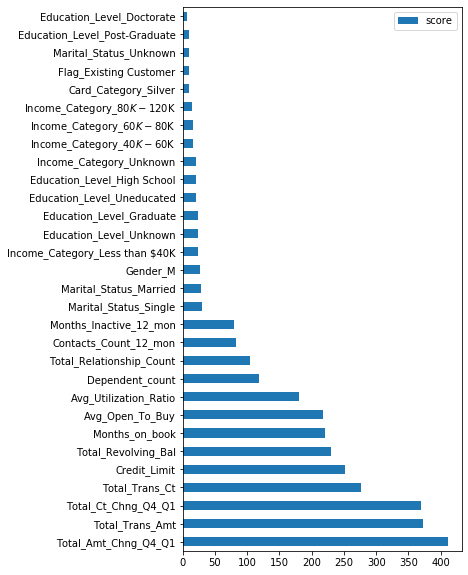

In [208]:
feature_important = xgbmodel.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data_score = pd.DataFrame(data=values, index=keys, columns=['score']).sort_values(by = 'score', ascending=False)
data_score.plot(kind='barh',figsize=(5,10))

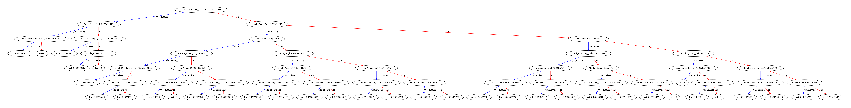

In [45]:
from matplotlib.pylab import rcParams
xgb.plot_tree(xgbmodel)
#rcParams['figure.figsize'] = 15,15
plt.savefig("temp.pdf")

---
### Other models

In [116]:
#linear
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
lrpredictions = logmodel.predict(x_test)

In [210]:
print(classification_report(y_test,lrpredictions))

                   precision    recall  f1-score   support

Attrited Customer       0.00      0.00      0.00       489
Existing Customer       0.84      1.00      0.91      2550

         accuracy                           0.84      3039
        macro avg       0.42      0.50      0.46      3039
     weighted avg       0.70      0.84      0.77      3039



C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [117]:
from sklearn.naive_bayes import MultinomialNB

nbmodel = MultinomialNB().fit(x_train, y_train)
nbpredictions=nbmodel.predict(x_test)

print(classification_report(y_test,nbpredictions))

                   precision    recall  f1-score   support

Attrited Customer       0.00      0.00      0.00       489
Existing Customer       0.84      1.00      0.91      2550

         accuracy                           0.84      3039
        macro avg       0.42      0.50      0.46      3039
     weighted avg       0.70      0.84      0.77      3039



C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=0,max_depth=100,n_estimators=50)
rfmodel.fit(x_train, y_train)
rfpredictions=rfmodel.predict(x_test)
print(classification_report(y_test,rfpredictions))

                   precision    recall  f1-score   support

Attrited Customer       1.00      0.00      0.00       489
Existing Customer       0.84      1.00      0.91      2550

         accuracy                           0.84      3039
        macro avg       0.92      0.50      0.46      3039
     weighted avg       0.87      0.84      0.77      3039



In [119]:
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(random_state=0)
gbmodel.fit(x_train,y_train)
gbpredictions=gbmodel.predict(x_test)
print(classification_report(y_test,gbpredictions))

                   precision    recall  f1-score   support

Attrited Customer       0.50      0.00      0.00       489
Existing Customer       0.84      1.00      0.91      2550

         accuracy                           0.84      3039
        macro avg       0.67      0.50      0.46      3039
     weighted avg       0.78      0.84      0.77      3039



---
### Second try with diferent data pre processing

### xgbclassfier

In [107]:
x = df_xgb.drop(['Attrition_Flag', 'Flag_Existing Customer'], axis = 1)
y = df_xgb.Attrition_Flag

In [121]:
x.shape

(10127, 31)

In [109]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=42)

In [144]:
grid = {'max_depth': 10,
       'n_estimators' : 50}

In [145]:
xgbmodel2 = xgb.XGBClassifier(random_state = 0)
xgbmodel2.max_depth #para modificar parametros por defecto
xgbmodel2.set_params(**grid)
xgbmodel2.fit(xtrain, ytrain)
xgbmodelpred2 = xgbmodel2.predict(xtest)
print(classification_report(ytest,xgbmodelpred2))

C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                   precision    recall  f1-score   support

Attrited Customer       0.91      0.88      0.89       496
Existing Customer       0.98      0.98      0.98      2543

         accuracy                           0.97      3039
        macro avg       0.94      0.93      0.94      3039
     weighted avg       0.97      0.97      0.97      3039



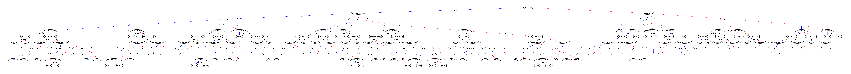

In [113]:
xgb.plot_tree(xgbmodel2)
plt.show()

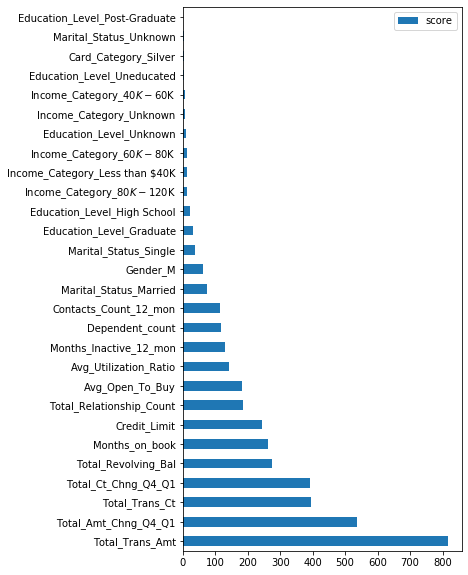

In [114]:
feature_important2 = xgbmodel2.get_booster().get_score(importance_type='weight')
keys2 = list(feature_important2.keys())
values2 = list(feature_important2.values())

data_score2 = pd.DataFrame(data=values2, index=keys2, columns=['score']).sort_values(by = 'score', ascending=False)
data_score2.plot(kind='barh',figsize=(5,10))

In [147]:
list(zip(xgbmodelpred2, ytest))[:15]

[('Existing Customer', 'Existing Customer'),
 ('Existing Customer', 'Existing Customer'),
 ('Existing Customer', 'Existing Customer'),
 ('Existing Customer', 'Existing Customer'),
 ('Existing Customer', 'Existing Customer'),
 ('Existing Customer', 'Existing Customer'),
 ('Existing Customer', 'Existing Customer'),
 ('Existing Customer', 'Existing Customer'),
 ('Existing Customer', 'Existing Customer'),
 ('Existing Customer', 'Attrited Customer'),
 ('Existing Customer', 'Existing Customer'),
 ('Existing Customer', 'Existing Customer'),
 ('Existing Customer', 'Existing Customer'),
 ('Attrited Customer', 'Attrited Customer'),
 ('Existing Customer', 'Existing Customer')]

In [148]:
xgbmodel2.save_model('/Users/jmaxi/Portafolio/Credit Card Attrited/xgboost_model.model')

### Other models

In [122]:
logmodel2 = LogisticRegression()
logmodel2.fit(xtrain,ytrain)
lrpredictions2 = logmodel2.predict(xtest)
print(classification_report(ytest,lrpredictions2))

                   precision    recall  f1-score   support

Attrited Customer       0.78      0.49      0.60       496
Existing Customer       0.91      0.97      0.94      2543

         accuracy                           0.90      3039
        macro avg       0.85      0.73      0.77      3039
     weighted avg       0.89      0.90      0.88      3039



In [123]:
nb = MultinomialNB().fit(xtrain, ytrain)
nbpreds=nb.predict(xtest)
print(classification_report(ytest,nbpreds))

                   precision    recall  f1-score   support

Attrited Customer       0.00      0.00      0.00       496
Existing Customer       0.84      1.00      0.91      2543

         accuracy                           0.84      3039
        macro avg       0.42      0.50      0.46      3039
     weighted avg       0.70      0.84      0.76      3039



C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [132]:
rf = RandomForestClassifier(random_state=0,max_depth=30, n_estimators=75) #este se ve prometedor
rf.fit(xtrain, ytrain)
rfpred=rf.predict(xtest)
print(classification_report(ytest,rfpred))

                   precision    recall  f1-score   support

Attrited Customer       0.92      0.74      0.82       496
Existing Customer       0.95      0.99      0.97      2543

         accuracy                           0.95      3039
        macro avg       0.94      0.86      0.90      3039
     weighted avg       0.95      0.95      0.95      3039



In [79]:
import joblib as jl

In [80]:
rf = jl.load('/Users/jmaxi/Portafolio/Credit Card Attrited/random_forest99percent.joblib')

In [84]:
rfpred=rf.predict(xtest)

In [133]:
#save a rf model
jl.dump(rf ,'/Users/jmaxi/Portafolio/Credit Card Attrited/random_forest99percent.joblib')
# rf = jl.load('/Users/jmaxi/Portafolio/Credit Card Attrited/random_forest99percent.joblib')

['/Users/jmaxi/Portafolio/Credit Card Attrited/random_forest99percent.joblib']

In [149]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(xtrain,ytrain)
gbpred=gb.predict(xtest)
print(classification_report(ytest,gbpred))

                   precision    recall  f1-score   support

Attrited Customer       0.93      0.82      0.87       496
Existing Customer       0.97      0.99      0.98      2543

         accuracy                           0.96      3039
        macro avg       0.95      0.90      0.92      3039
     weighted avg       0.96      0.96      0.96      3039



---
# Dense model

In [150]:
import tensorflow as tf

In [170]:
ANN = tf.keras.models.Sequential()

ANN.add(tf.keras.layers.Dense(64, activation = 'relu', input_dim = 31))
ANN.add(tf.keras.layers.Dense(32, activation = 'relu'))
ANN.add(tf.keras.layers.Dense(16, activation = 'relu'))
ANN.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

ANN.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'binary_crossentropy')

ANN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                2048      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [155]:
ann_df = df_xgb

In [157]:
x_ann = x
y_ann = df_xgb['Flag_Existing Customer']

ann_X_train, ann_X_test, ann_Y_train, ann_Y_test = train_test_split(x_ann, y_ann, test_size=0.30, random_state=42)

In [151]:
from imblearn.over_sampling import SMOTE

In [158]:
smote = SMOTE(random_state = 42)

sm_xtrain, sm_ytrain = smote.fit_sample(ann_X_train, ann_Y_train)

In [171]:
ANN.fit(sm_xtrain, sm_ytrain, epochs=150, batch_size=32,verbose=0)

In [174]:
annpred=ANN.predict(ann_X_test)
annpredictions = [1 if x>0.7 else 0 for x in annpred]
print(classification_report(ann_Y_test, annpredictions))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       496
           1       0.95      0.93      0.94      2543

    accuracy                           0.90      3039
   macro avg       0.81      0.85      0.83      3039
weighted avg       0.91      0.90      0.90      3039

